In [4]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()  

In [5]:
#titanic will be a binary classification problem, i.e. have they survived or not?
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [50]:
train_titanic = load_titanic_data("train.csv")
test_titanic = load_titanic_data("test.csv")
test_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train_titanic.head() #survived is 0 or 1, this will be our label ig
#set index that is passengerId
test_titanic.set_index("PassengerId")
train_titanic.set_index("PassengerId")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [46]:
y_train = train_titanic["Survived"]

In [9]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#probs gonna wanna do smthn about the categorical attributes
#name we can remove, idt that'll matter lol. what;s sibsp and parch? ticket can also ignore, fare as well, likely will want to care about
#pclass, sex, age, will likely want to add parch and sibSP since we don't rly know what they are but may be useful


<Axes: xlabel='Sex', ylabel='Count'>

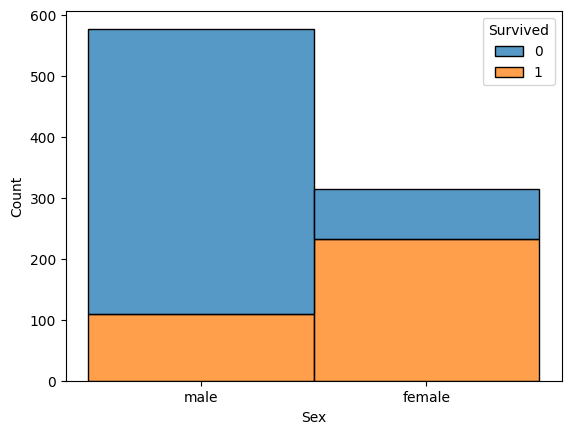

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=train_titanic, x="Sex", hue="Survived", multiple="stack")

<Axes: xlabel='Age', ylabel='Count'>

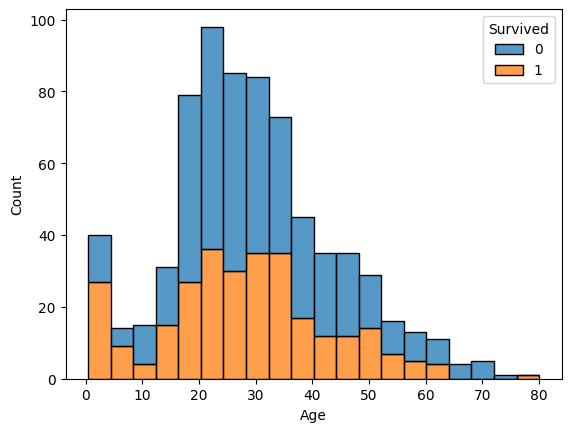

In [12]:
sns.histplot(data=train_titanic, x="Age", hue="Survived", multiple="stack")

<Axes: xlabel='Pclass', ylabel='Count'>

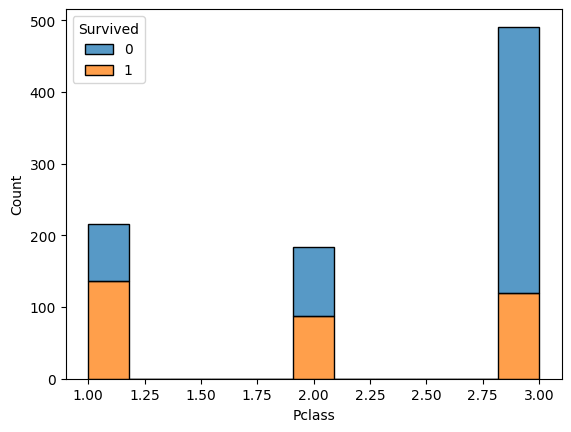

In [13]:
sns.histplot(data=train_titanic, x="Pclass", hue="Survived", multiple="stack")

<Axes: xlabel='SibSp', ylabel='Count'>

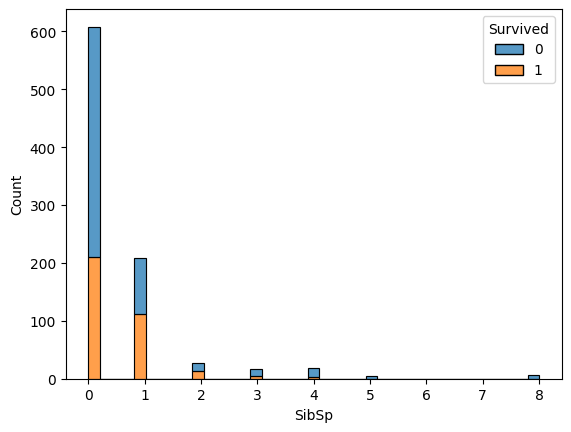

In [14]:
sns.histplot(data=train_titanic, x="SibSp", hue="Survived", multiple="stack") #sibsp = number of sibling

In [29]:
#drop non-numeric variables cause hey, y do we need tbhem? or like the ones that aren't categorical either
new = train_titanic.drop(["Name", "Ticket", "Cabin", "Sex", "Embarked"], axis=1)

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
titanic_cat = train_titanic[['Sex', 'Embarked']]
titanic_cat_1hot = cat_encoder.fit_transform(titanic_cat)
titanic_cat_1hot = pd.DataFrame(titanic_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out(['Sex', 'Embarked']))
only_num = pd.concat([new, titanic_cat_1hot], axis=1)

In [30]:
corr_matrix = only_num.corr()

In [31]:
corr_matrix["Survived"].sort_values(ascending=False)
#okay yayyy so we computer a correlation matrix, highest correlation is with gender, then there's a high one with class, p high one with fare and with embarked.

Survived        1.000000
Sex_female      0.543351
Fare            0.257307
Embarked_C      0.168240
Parch           0.081629
Embarked_nan    0.060095
Embarked_Q      0.003650
PassengerId    -0.005007
SibSp          -0.035322
Age            -0.077221
Embarked_S     -0.155660
Pclass         -0.338481
Sex_male       -0.543351
Name: Survived, dtype: float64

In [33]:
# instead of transforming this way, we should make a pipeline to both a) replace missing values for numeric and categoric variables b) standardize numerical data using standard scaler and c) convert categorical variables to numeric

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numerical_pip = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [40]:
categorical_pip = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder())
    ])

In [41]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", numerical_pip, num_attribs),
        ("cat", categorical_pip, cat_attribs),
    ])

In [43]:
titanic_train_fit = preprocess_pipeline.fit_transform(train_titanic[num_attribs + cat_attribs])

In [64]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators = 10, max_features = 8)
forest_clf.fit(titanic_train_fit, y_train)

RandomForestClassifier(max_features=8, n_estimators=10, random_state=42)

In [65]:
X_test = preprocess_pipeline.fit_transform(test_titanic[num_attribs + cat_attribs])

In [66]:
y_pred = forest_clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1, gamma =0.1, random_state=42)
scores = cross_val_score(clf, titanic_train_fit, y_train, cv=10)
scores.mean()
#78.7, which isn't GREAT... so run gridsearchcv?

0.786729088639201

In [70]:
#random forest scores:
score = cross_val_score(forest_clf, titanic_train_fit, y_train, cv=100)
score.mean() #higher score but obv we dunno the best parameters for either
#with scores from gridsearchcv, get about 82, let'[s try it for svc

0.8245833333333334

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, 10]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(titanic_train_fit, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid_svc = {'C':[0.1, 1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_search = GridSearchCV(clf, param_grid_svc, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(titanic_train_fit, y_train)

GridSearchCV(cv=5,
             estimator=SVC(C=1, gamma=0.1, kernel='linear', random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='neg_mean_squared_error')